<a href="https://colab.research.google.com/github/BeardedMaker/lemay/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please explain why you have chosen this dataset for your demonstration of exploratory data analysis. Dataset: https://huggingface.co/datasets/rotten_tomatoes

I enjoy movies and regularly check Rotten Tomatoes for reviews before watching so checking to see what positive and negative reviews are like. I thought it would be a fun exercise to see what kind of keywords one should look for when checking the reviews and how many the polarity differs between positive and negative comments


#Get the dataset

In [78]:
!wget https://storage.googleapis.com/seldon-datasets/sentence_polarity_v1/rt-polaritydata.tar.gz

--2022-09-27 21:08:47--  https://storage.googleapis.com/seldon-datasets/sentence_polarity_v1/rt-polaritydata.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.211.128, 173.194.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487770 (476K) [application/gzip]
Saving to: ‘rt-polaritydata.tar.gz’

rt-polaritydata.tar 100%[===================>] 476.34K  --.-KB/s    in 0.005s  

2022-09-27 21:08:47 (103 MB/s) - ‘rt-polaritydata.tar.gz’ saved [487770/487770]



#Unzip the dataset files

In [79]:
!tar --gunzip --extract --file=rt-polaritydata.tar.gz

# Navigate to the folder containing the files

In [80]:
%cd rt-polaritydata/

/content/rt-polaritydata/rt-polaritydata


In [81]:
# list all the files and their details in the folder and you'll find 'rt-polarity.pos' and 'rt-polarity.neg' files
!ls -l

total 1212
-rw------- 1 662 662 612290 Jun 18  2005 rt-polarity.neg
-rw------- 1 662 662 626168 Jun 18  2005 rt-polarity.pos


# Read files into lists

In [82]:
# data_dir = "rt-polaritydata/" #REMOVE COMMENT if you did not run the cd command above
pos_samples, neg_samples = None, None

#Read Positive Review File
path = "rt-polarity.pos"
with open(path, "r", encoding='latin-1') as filepos:
    pos_samples = [line for line in filepos.read().split('\n')] # Store each line as a list element
    
print(pos_samples[0]) #Check 1st line of positive review

#Read Negative Review File
path = "rt-polarity.neg"
with open(path, "r", encoding='latin-1') as filepos:
    neg_samples = [line for line in filepos.read().split('\n')]

print(neg_samples[0]) #Check 1st line of negative review

the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . 
simplistic , silly and tedious . 


# Calculate Positive and Negative Sentiments

In [84]:
from textblob import TextBlob
pos_sum = 0 # Sum of Positive Sentiments
for line in pos_samples:
  blob = TextBlob(line)
  pos_sum += blob.sentiment.polarity #Sentiment value of each line in review
print('Total Positive Sentiment Polarity =',pos_sum)

neg_sum = 0 # Sum of Negative Sentiments
for line in neg_samples:
  blob = TextBlob(line)
  neg_sum += blob.sentiment.polarity
print('Total Negative Sentiment Polarity =',neg_sum)

Total Positive Sentiment Polarity = 1043.1539445994372
Total Negative Sentiment Polarity = 54.99096671406209


#Generate Wordcloud for Positive and Negative Reviews

In [85]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

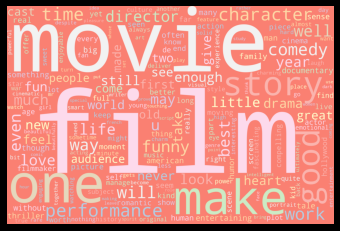

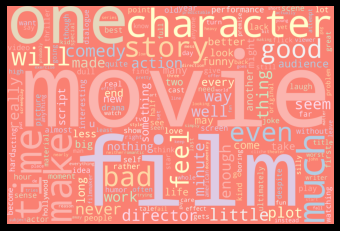

In [86]:
#For Positive Reviews
pos_text = ''.join(pos_samples) #Convert list of strings into 1 long string
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(pos_text) #wordcloud for positive reviews
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#For Negative Reviews
neg_text = ''.join(neg_samples)
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(neg_text)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#Remove common words seen frequently in both reviews for better analysis

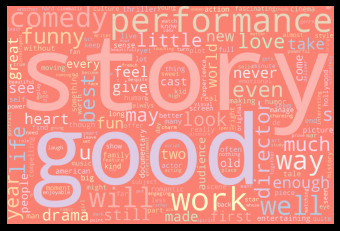

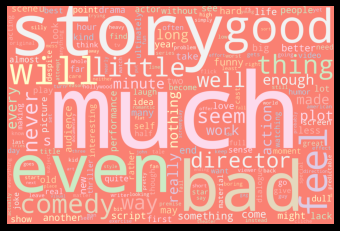

In [87]:
remove_words = ['movies','movie','films','film','one','characters','character','makes','make','times','time']

#For Positive Review Wordcloud
#pos_text = ''.join(pos_samples) #REMOVE COMMENT if you did not run the above code block
for words in remove_words: #remove all words in remove_words from the file content
  if words in pos_text:
    pos_text = pos_text.replace(words,'')

word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(pos_text)
import matplotlib.pyplot as plt
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#For Negative Review Wordcloud
#neg_text = ''.join(neg_samples) #REMOVE COMMENT if you did not run the above code block
for words in remove_words:
  if words in neg_text:
    neg_text = neg_text.replace(words,'')

word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(neg_text)
import matplotlib.pyplot as plt
plt.imshow(word_cloud)
plt.axis("off")
plt.show()